# Import Libraries

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation , Conv2D , MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

In [2]:
# fashion_mnist a very popular dataset. In addition they are built-in dataset in tensorflow.
f_mnist = tf.keras.datasets.fashion_mnist

# They coming as a part of 4 arrays in 2 tuples.
(X_train, y_train),(X_test, y_test) = f_mnist.load_data()

# We do manual MinMax Scaling
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Train Pictures size:", X_train.shape)
print("Train Label size", y_train.shape)
print("Test Pictures size:", X_test.shape)

Train Pictures size: (60000, 28, 28)
Train Label size (60000,)
Test Pictures size: (10000, 28, 28)


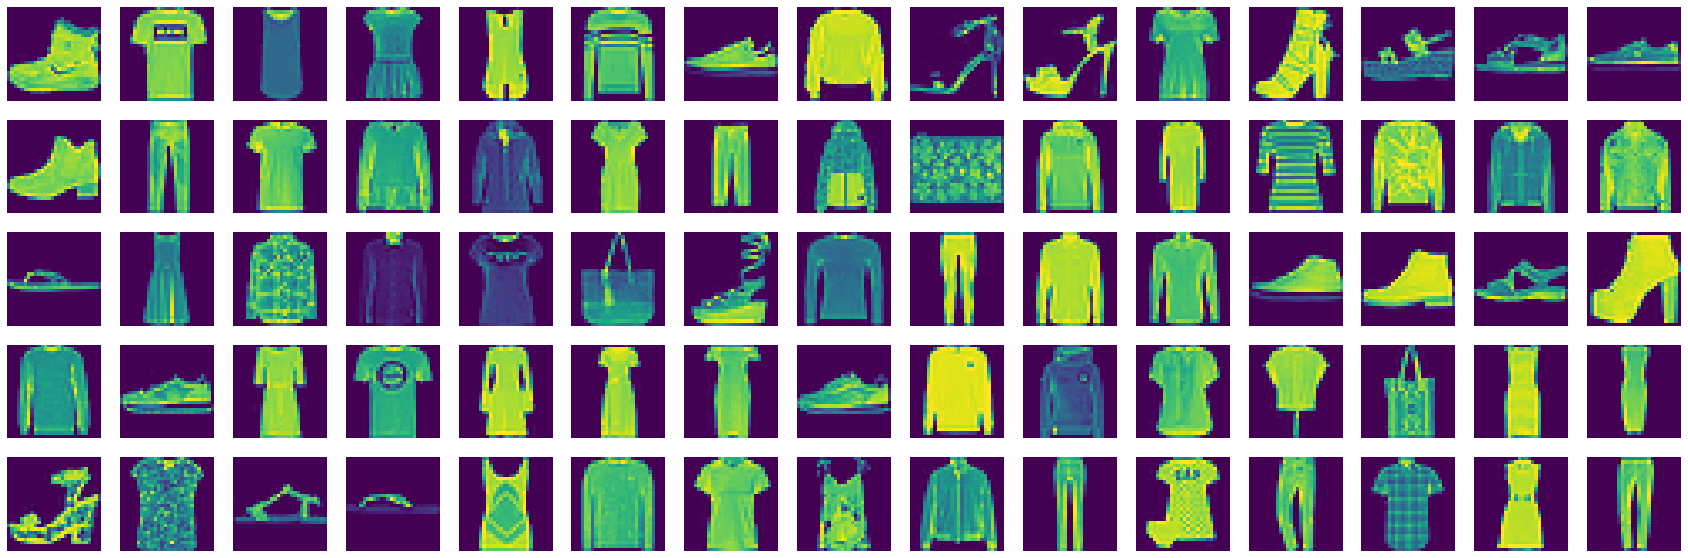

In [3]:
fig = plt.figure(figsize=(30,10))

for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(X_train[i])
    
    plt.axis('off')

plt.show()

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (28,28) ))
model.add(Dense(512 , activation = 'relu'))
model.add(Dense(10 , activation = 'softmax'))

In [10]:
# model = tf.keras.models.Sequential([

#   tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten is important part for CNN.
#   tf.keras.layers.Dense(512, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax') # We have 10 class and we use softmax because it works good on Multi-Classing.
# ])

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [12]:
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, validation_split = 0.1 , batch_size = 128 , epochs = 20)

Epoch 1/20
422/422 [==============================] - 4s 3ms/step - loss: 0.5156 - accuracy: 0.8197 - val_loss: 0.4307 - val_accuracy: 0.8463
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3783 - accuracy: 0.8658 - val_loss: 0.3516 - val_accuracy: 0.8738
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3380 - accuracy: 0.8780 - val_loss: 0.3712 - val_accuracy: 0.8655
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3119 - accuracy: 0.8873 - val_loss: 0.3257 - val_accuracy: 0.8820
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2931 - accuracy: 0.8922 - val_loss: 0.3160 - val_accuracy: 0.8833
Epoch 6/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8981 - val_loss: 0.3255 - val_accuracy: 0.8867
Epoch 7/20
422/422 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9025 - val_loss: 0.3136 - val_accuracy: 0.8878
Epoch 

In [14]:
model.history.history

{'loss': [0.5155895352363586,
  0.37827908992767334,
  0.33798104524612427,
  0.3119083046913147,
  0.29313719272613525,
  0.27657270431518555,
  0.2654716968536377,
  0.2507998049259186,
  0.23898302018642426,
  0.23299017548561096,
  0.22024348378181458,
  0.21735993027687073,
  0.20209702849388123,
  0.1959957480430603,
  0.1915910243988037,
  0.18335996568202972,
  0.1756492555141449,
  0.1717529296875,
  0.16526366770267487,
  0.16304577887058258],
 'accuracy': [0.8197407126426697,
  0.8657962679862976,
  0.8779629468917847,
  0.887333333492279,
  0.892203688621521,
  0.89811110496521,
  0.9024814963340759,
  0.9072407484054565,
  0.9129258990287781,
  0.9139074087142944,
  0.9183148145675659,
  0.9199073910713196,
  0.924907386302948,
  0.9266111254692078,
  0.9301666617393494,
  0.9321110844612122,
  0.9350185394287109,
  0.9365555644035339,
  0.9386296272277832,
  0.9389073848724365],
 'val_loss': [0.4307495057582855,
  0.35158926248550415,
  0.3712218403816223,
  0.32573440670

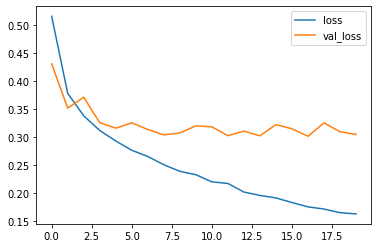

In [15]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()

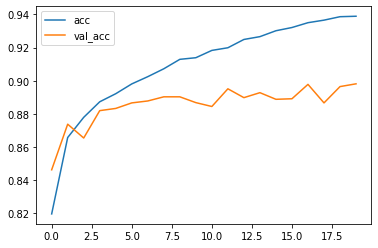

In [16]:
plt.plot(model.history.history['accuracy'], label='acc')
plt.plot(model.history.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8957


[0.3312830328941345, 0.8956999778747559]

In [18]:
y_pred = model.predict(X_test)
y_pred # Softmax telling us probability of all classes.

313/313 [==============================] - 1s 2ms/step


array([[1.7515713e-09, 4.6451873e-10, 4.6640825e-09, ..., 3.8579106e-04,
        7.7440349e-10, 9.9957055e-01],
       [4.0350136e-05, 3.5561043e-13, 9.9896991e-01, ..., 1.3824711e-12,
        1.2284840e-12, 5.0660181e-13],
       [8.4769093e-12, 1.0000000e+00, 1.9113906e-15, ..., 2.6335143e-22,
        3.8944593e-14, 5.7520481e-18],
       ...,
       [5.1750785e-06, 1.8911711e-13, 8.1762671e-08, ..., 4.9350295e-08,
        9.9999201e-01, 7.8472351e-15],
       [3.2651847e-11, 9.9999893e-01, 1.8610847e-11, ..., 1.6613780e-15,
        9.6409103e-10, 2.4530383e-13],
       [1.6667727e-06, 9.7909503e-09, 1.2753655e-06, ..., 1.3631504e-04,
        3.1508623e-07, 1.5927412e-07]], dtype=float32)

In [19]:
y_pred[0] # % 99 last class.

array([1.7515713e-09, 4.6451873e-10, 4.6640825e-09, 9.5755792e-11,
       6.3637068e-10, 4.3671498e-05, 1.9501030e-08, 3.8579106e-04,
       7.7440349e-10, 9.9957055e-01], dtype=float32)

In [20]:
y_pred = model.predict(X_test).argmax(axis=1) # We get maximum probabilities
y_pred

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [21]:
import random as rd

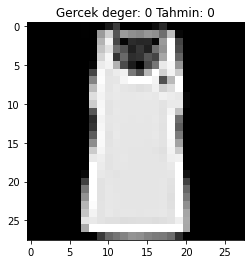

In [22]:
i = rd.randint(0, 9999)
plt.imshow(X_test[i], cmap='gray')

plt.title(f"Real_Value: {y_test[i]} Predict: {y_pred[i]}");

In [23]:
# Done.